# Dataset Initial Preparation and Merging

## UK Dataset

## Dataset Merging and Initial Selection

In [23]:
# importing of relevant libraries
import pandas as pd
import shutil
import os
import numpy as np 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

moving of files

In [8]:
# source + destination
source = 'UK\Data_Sets'
destination = 'Destination'

In [9]:
files = os.listdir(source)
for files in files: # subfolders 
    sub_path = os.path.join(source, file)
    subfolders = os.listdir(sub_path)
    for one_file in subfolders: # files in the subfolders
        if ('core' in one_file or 'Core' in one_file) \ 
        and ('Analysis' not in one_file and 'Source' not in one_file) \
        and (one_file.endswith(('xls','xlsx'))): # requirement for file selection
        deep_path = os.path.join(one_path, one_file) # full path of files of subfolder
        shutil.move(deep_path, destination)
print('files have been moved')

merging files

In [ ]:
# split xls data into 1 folder and xlsx data into another folder and then merge seperately and saved as csv format
#xls file 
source = r'Destination\xls'
destination = r'Destination\xls'
save_name = r'combined'
save_format = r'.csv'
saved_file_name = save_name + save_format
count = 0

file_list = os.listdir(source)

df = pd.read_excel(source+'\\'+file_list[0])
df.to_csv(destination+'\\'+ saved_file_name, index = False) # first file with the column headers

#loop each xls file to append into combined file
for i in range(1, len(file_list)):
    df = pd.read_excel(source+'\\'+file_list[i], engine = 'xlrd')
    #print(file) # used for trial and error to remove corrupted files
    #print(df) # used for trial and error to remove corrupted files
    df.to_csv(destination+'\\'+ saved_file_name, index = False, header = False, mode='a+')
    count+=1
print(f'{count} file is done merging' )

In [ ]:
#xlsx file 
source = r'Destination\xlsx'
destination = r'Destination\xlsx'
save_name = r'combined'
save_format = r'.csv'
saved_file_name = save_name + save_format
count = 0

file_list = os.listdir(source)

df = pd.read_excel(source+'\\'+file_list[0])
df.to_csv(destination+'\\'+ saved_file_name, index = False) # first file with the column headers

#loop each xlsx file to append into combined file
for i in range(1, len(file_list)):
    df = pd.read_excel(source+'\\'+file_list[i])
    #print(file) # used for trial and error to remove corrupted files
    #print(df) # used for trial and error to remove corrupted files
    df.to_csv(destination+'\\'+ saved_file_name, index = False, header = False, mode='a+')
    count+=1
print(f'{count} file is done merging' )

In [ ]:
# merge the two files into a single csv
source = r'Destination\final'
destination = r'Destination\final'
save_name = r'combined'
save_format = r'.csv'
saved_file_name = save_name + save_format
count = 0

file_list = os.listdir(source)

df = pd.read_csv(source+'\\'+file_list[0])
df.to_csv(destination+'\\'+ saved_file_name, index = False) # first file with the column headers

#loop to append into combined file
for i in range(1, len(file_list)):
    df = pd.read_csv(source+'\\'+file_list[i])
    df.to_csv(destination+'\\'+ saved_file_name, index = False, header = False, mode='a+')
    count+=1
print(f'{count} file is done merging' )

In [11]:
# Read merged file into dataframe
df_UK = pd.read_csv("UK.csv")

C:\Users\tan\AppData\Local\Temp\ipykernel_6868\763747586.py:1: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,20,22,23,24,26,28,29,30,32,33,34,35,39,40,41,42,43,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df_UK = pd.read_csv("UK.csv")


In [15]:
print(df_UK.isnull().sum().to_string)

<bound method Series.to_string of Wellname                                 15794
UWN                                      27632
CountryCode                              15552
CORE_NUMBER                              20450
DATE_CUT                                540112
WATER_OIL_LEG                           536304
AGE                                     546930
FORMATION                               583750
LITHOLOGY                               579654
SAMPLE_NUMBER                           101074
SAMPLE_DEPTH                             65538
FT_MTR                                   68484
CORE_SHIFTS_APPLIED                     552708
BRINELL_HARDNESS                        542816
GRAIN_DENSITY                           170258
SATURATION_OIL                          463162
SATURATION_WATER                        447298
SATURATION_GAS                          562216
F.S.P. (Porosity by Fluid Summation)    469448
F.S.P. Note.                            530070
POROSITY 1                

In [16]:
# Initial Selection of Columns
df_UK = df_UK[['SATURATION_OIL', 'SATURATION_WATER', 'POROSITY 1', 'HOR_PERMEABILITY 1']]

In [20]:
print(df_UK.shape)
print(df_UK.isnull().sum()) # check number of null data in each column

(589968, 4)
SATURATION_OIL        463162
SATURATION_WATER      447298
POROSITY 1            168354
HOR_PERMEABILITY 1    181056
dtype: int64


In [21]:
df_UK.to_csv("UK1.csv", index=False) #write to csv format

## Dataset  Preparation and Understanding

In [463]:
df_UK = pd.read_csv(r'Cleaned\UK\UK1.csv',skipinitialspace=True)

C:\Users\tan\AppData\Local\Temp\ipykernel_6868\2404573795.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_UK = pd.read_csv(r'Cleaned\UK\UK1.csv',skipinitialspace=True)


In [464]:
df_UK.head()

,SATURATION_OIL,SATURATION_WATER,POROSITY 1,HOR_PERMEABILITY 1
0,NaN,35.5,32.7,922
1,NaN,NaN,32.8,963
2,NaN,NaN,33.1,904
3,NaN,NaN,31.4,903
4,NaN,NaN,31.8,953


In [465]:
df_UK.shape

(589968, 4)

In [466]:
df_UK.isnull().sum()

SATURATION_OIL        463236
SATURATION_WATER      447304
POROSITY 1            168502
HOR_PERMEABILITY 1    181214
dtype: int64

In [467]:
df_UK.dtypes

SATURATION_OIL        object
SATURATION_WATER      object
POROSITY 1            object
HOR_PERMEABILITY 1    object
dtype: object

In [468]:
# Replacing Strings (Iterative Manner due to dtype change code)
string_list = ['NFSP', 'Tr.','.','Horizontal','Horizontal Helium','Vertical','Helium_Vertical','TRACE','Wet'\
              ,'Depth (ft.)','FAIL','Helium','Helium - Vertical','Helium (500psi)_Vertical', 'KL millidarcies'\
              ,'Vertical Helium','Air','> Kg millidarcies @ 300 psi ','Kg millidarcies @ 300 psi ']
df_UK = df_UK.replace(string_list,np.nan)
df_UK = df_UK.replace('42. 3',42.3)
df_UK = df_UK.replace('<0.01',0.01)
df_UK = df_UK.replace('43 .2',43.2)

In [469]:
df_UK = df_UK.dropna(how='all')

In [470]:
df_UK.isnull().sum()

SATURATION_OIL        311676
SATURATION_WATER      294514
POROSITY 1             19420
HOR_PERMEABILITY 1     51058
dtype: int64

In [471]:
df_UK = df_UK.dropna(subset=['SATURATION_OIL','SATURATION_WATER'],how='all')

In [472]:
df_UK.shape

(145208, 4)

In [473]:
df_UK = df_UK.dropna(subset=['POROSITY 1','HOR_PERMEABILITY 1'], how='all')

In [474]:
df_UK.shape

(134146, 4)

In [475]:
df_UK.isnull().sum()

SATURATION_OIL        16804
SATURATION_WATER       1056
POROSITY 1             1258
HOR_PERMEABILITY 1     9578
dtype: int64

In [476]:
df_UK = df_UK.apply(pd.to_numeric)

In [477]:
df_UK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134146 entries, 0 to 589963
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SATURATION_OIL      117342 non-null  float64
 1   SATURATION_WATER    133090 non-null  float64
 2   POROSITY 1          132888 non-null  float64
 3   HOR_PERMEABILITY 1  124568 non-null  float64
dtypes: float64(4)
memory usage: 5.1 MB


In [478]:
df_UK.corr()

,SATURATION_OIL,SATURATION_WATER,POROSITY 1,HOR_PERMEABILITY 1
SATURATION_OIL,1.000000,-0.524677,0.120355,0.101586
SATURATION_WATER,-0.524677,1.000000,0.325077,-0.072005
POROSITY 1,0.120355,0.325077,1.000000,0.424597
HOR_PERMEABILITY 1,0.101586,-0.072005,0.424597,1.000000


In [479]:
# remove outliers in all columns
sd = 3 
df_UK = df_UK[df_UK.apply(lambda x:np.abs(x - x.mean()) / x.std() < sd).all(axis=1)]

In [480]:
df_UK = df_UK[['POROSITY 1', 'HOR_PERMEABILITY 1']]
df_UK.columns = ['Porosity', 'Permeability']

In [481]:
df_UK['Porosity'] = df_UK['Porosity'].div(100)
df_UK['Permeability'] = df_UK['Permeability'].div(100)
df_UK.reset_index(inplace=True, drop = True)

In [482]:
UK_knn_df = df_UK.copy()

In [483]:
# Min Max Scale and Fill in missing data using KNN imputer
scaler = MinMaxScaler(feature_range=(0,1))

UK_knn_df = pd.DataFrame(scaler.fit_transform(UK_knn_df), columns=UK_knn_df.columns)

knnimputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')

new_UK_KNN_df = pd.DataFrame(knnimputer.fit_transform(UK_knn_df), columns=UK_knn_df.columns)

In [484]:
new_UK_KNN_df.isnull().sum()

Porosity        0
Permeability    0
dtype: int64

In [485]:
# Creation of columns based on porosity and permeability needed for the traditional method
new_UK_KNN_df['RQI'] = 0.0314*(new_UK_KNN_df['Permeability']/new_UK_KNN_df['Porosity'])**0.5
new_UK_KNN_df['Porosity Index'] = new_UK_KNN_df['Porosity']/(1 - new_UK_KNN_df['Porosity'])
new_UK_KNN_df['FZI'] = new_UK_KNN_df['RQI']/new_UK_KNN_df['Porosity Index']
new_UK_KNN_df['Log Porosity Index'] = np.log10(new_UK_KNN_df['Porosity Index'])
new_UK_KNN_df['Log RQI'] = np.log10(new_UK_KNN_df['RQI'])

C:\Users\tan\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\tan\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [486]:
df_UK.head()

,Porosity,Permeability
0,0.013,0.0003
1,0.021,0.0003
2,0.280,8.9600
3,0.244,11.2400
4,0.191,3.6300


In [487]:
new_UK_KNN_df[np.isinf(new_UK_KNN_df).any(1)]
to_drop = new_UK_KNN_df.index[np.isinf(new_UK_KNN_df).any(1)]

<class 'list'>


In [488]:
to_drop = list(to_drop)

[829, 23194, 25067, 26029, 31192, 53250, 75615, 77488, 78450, 83613]


In [490]:
df_UK = df_UK.drop(to_drop) # remove rows with infinity value for the non normalised data

In [494]:
new_UK_KNN_df = new_UK_KNN_df.drop(to_drop) # remove rows with infity values for the normalised data

In [496]:
df_UK.reset_index(inplace=True, drop = True)
new_UK_KNN_df.reset_index(inplace=True, drop = True)

In [497]:
new_UK_KNN_df = new_UK_KNN_df.sort_values(by=['FZI']) # required step for traditional method

In [500]:
df_UK.reindex(new_UK_KNN_df.index) # changing the order of the non normalised data to follow the normalised one for plotting of charts 

,Porosity,Permeability
68946,0.380,0.0001
16530,0.380,0.0001
54880,0.241,0.0001
2464,0.241,0.0001
29639,0.389,0.0115
...,...,...
93094,0.003,0.1500
40666,0.002,0.0540
93082,0.002,0.0540
44818,0.005,3.3700


In [502]:
df_UK.reset_index(inplace=True, drop = True)
new_UK_KNN_df.reset_index(inplace=True, drop = True)

<AxesSubplot:xlabel='Porosity', ylabel='Permeability'>

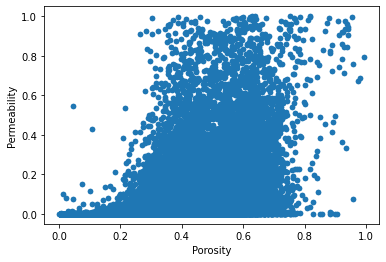

In [503]:
new_UK_KNN_df.plot.scatter(x='Porosity',y='Permeability',xlabel='Porosity',ylabel='Permeability')

<AxesSubplot:>

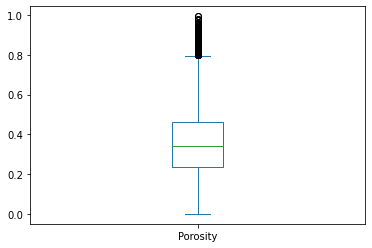

In [509]:
new_UK_KNN_df.plot(kind='box', column='Porosity')

<AxesSubplot:>

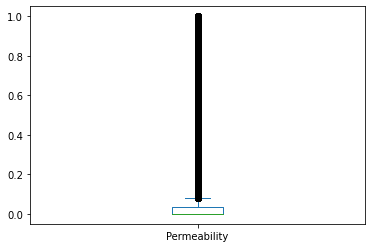

In [510]:
new_UK_KNN_df.plot(kind='box', column='Permeability')

In [515]:
#write to csv format
df_UK.to_csv("UK_not_normalised.csv", index=False) 
df_UK.to_csv("UKfortraining1.csv", index=False) 